# Assignment_4 DT

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Part 1 Decision Tree


In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf_depth_2 = DecisionTreeClassifier(max_depth=2, random_state=42, criterion='entropy')
tree_clf_depth_2.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

## Q1 Plot decision tree using export_graphviz

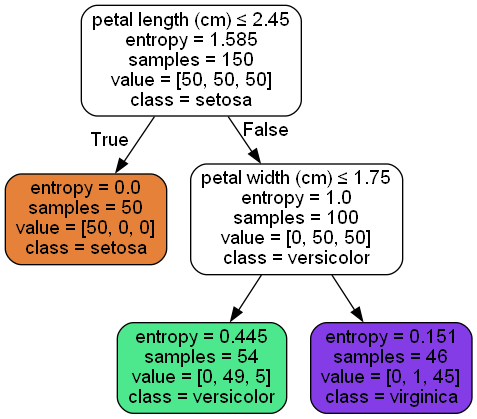

In [3]:
import graphviz
from IPython.display import Image
from sklearn.tree import export_graphviz

feature_names = iris.feature_names[2:]

tree_graph = export_graphviz(tree_clf_depth_2, out_file=None, 
                        feature_names=feature_names,  
                        class_names=iris.target_names,  
                        filled=True, rounded=True,  
                        special_characters=True)  
graph = graphviz.Source(tree_graph)  
graph.render("iris_decision_tree") 

png_bytes = graph.pipe(format='png')
Image(png_bytes)

## Q2 Plotting decision boundaries

Use the following function to plot the decision boundaries of DT from Q1

In [4]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

Plotting for max_depth = 2

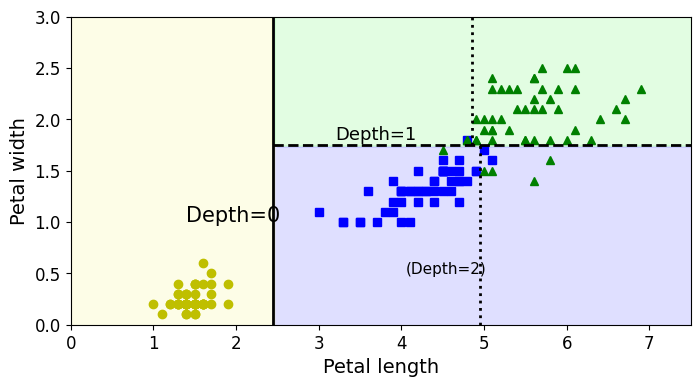

In [5]:
plt.figure(figsize=(8, 4))

plot_decision_boundary(tree_clf_depth_2, X, y)

plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)
plt.show()

### Q2.1
- Train the decision tree using a maximum depth of 1.
- Plot the decision tree using graphviz
- Use the above function to plot the decision boundaries

**Question**
1. After plotting the resulting tree.
    - What's the output entropy in each block?
    - Comment on the entropy values in each block.
2. What's the difference in decision trees between using max_depth = 1, max_depth = 2, max_depth = 10? *Hint: Plot the tree in each case*

**Answer**

1.
   *) The Entropy values are 1.585 for the root then 0.0 if petal length is<= 2.45 esle its 1.0 

   *)  Entropy of 1.585 which means that the set of data is not perfectly pure, and there is some degree of uncertainty in determining the class of the samples. 

      The entropy becomes 0.0, indicating that the subset is perfectly pure and here is no uncertainty in classifying the samples. if petal length <= 2.45.

      Esle when its 1.0 which means its very uncertainity and it gives class versicolor by Default.
2.
   *) Tree of Depth 1 : can only make a single split, and so it can only represent very simple decision boundary which is not suffient for classifcation for both virginica and versicolor just gets setosa.

      While tree of Depth 2 :  can make two splits, which allows it to represent more complex decision boundaries than a tree with max_depth=1. However, it is still relatively simple and is less likley to overfitting than a deeper tree and also is consider good at classification relativily
      
      While tree of deapth 10: can make up to ten splits, which means it can represent very complex decision boundaries, but it is also much more likely to overfit the training data.

## Creating a tree of Max Depth 1

In [6]:
iris = load_iris()
X = iris.data[:, 2:]
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=1, random_state=42, criterion='entropy')
tree_clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=42)

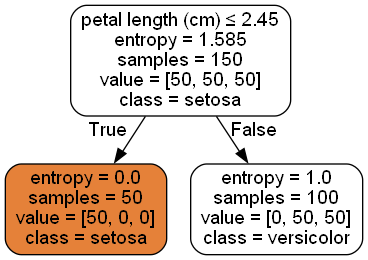

In [7]:
tree_graph = export_graphviz(tree_clf, out_file=None, 
                        feature_names=feature_names,  
                        class_names=iris.target_names,  
                        filled=True, rounded=True,  
                        special_characters=True)  
graph = graphviz.Source(tree_graph)  
graph.render("iris_decision_tree_max_depth_1")

png_bytes = graph.pipe(format='png')
Image(png_bytes)

Text(1.4, 1.0, 'Depth=0')

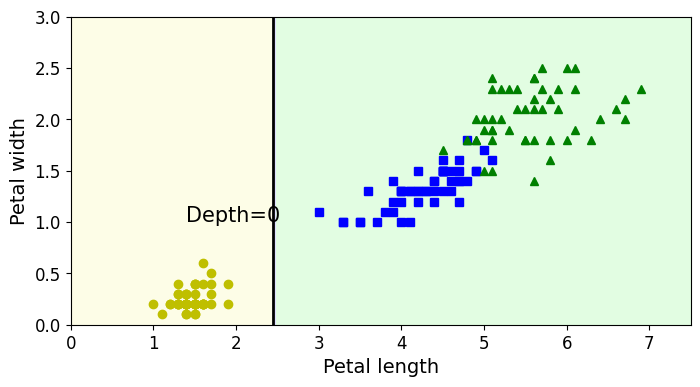

In [8]:
plt.figure(figsize=(8, 4))

plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)


## Tree Of max Depth 10

In [9]:
iris = load_iris()
X = iris.data[:, 2:]
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=10, random_state=42, criterion='entropy')
tree_clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)

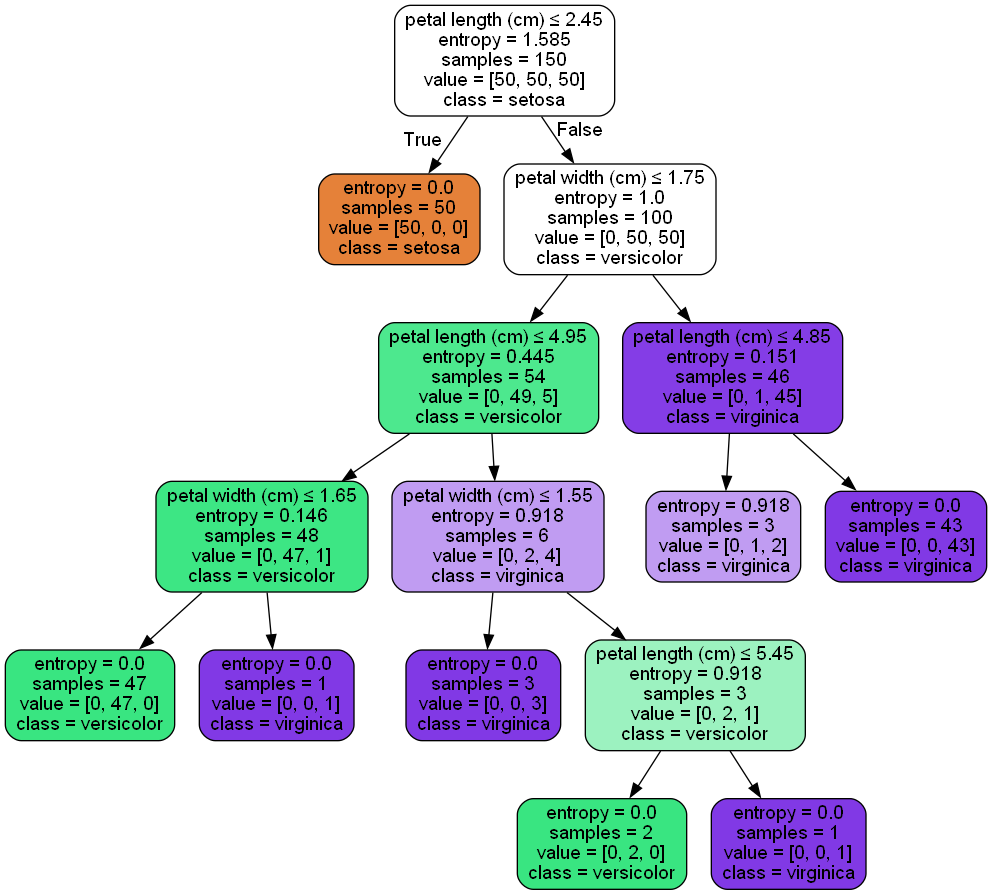

In [10]:
tree_graph = export_graphviz(tree_clf, out_file=None, 
                        feature_names=feature_names,  
                        class_names=iris.target_names,  
                        filled=True, rounded=True,  
                        special_characters=True)  
graph = graphviz.Source(tree_graph)  
graph.render("iris_decision_tree_max_depth_10") 
png_bytes = graph.pipe(format='png')
Image(png_bytes)

### Q2.2

**Question**
1. Calculate probabilities of all classes on this data point X = [[5, 1.5]] using decision tree with max_depth = 2
2. Compare your result with "predict_proba" function.

**Answer**
1. we can simply track the tree to 0,1,2[0,49,5] so we can get probabilty which is

    if class 0 (Setosa) =0/54 =0

    if class 1 (Versicolor)=49/54=0.91

    if class 2 (Virginica) = 5/54 =0.09

In [11]:
from sklearn.tree import DecisionTreeClassifier


proba = tree_clf_depth_2.predict_proba([[5, 1.5]])

print("Probabilities of all classes on X = [[5, 1.5]]:")
print("Class 0 (Setosa): {:.2f}".format(proba[0][0]))
print("Class 1 (Versicolor): {:.2f}".format(proba[0][1]))
print("Class 2 (Virginica): {:.2f}".format(proba[0][2]))

Probabilities of all classes on X = [[5, 1.5]]:
Class 0 (Setosa): 0.00
Class 1 (Versicolor): 0.91
Class 2 (Virginica): 0.09


## Question 3 Sensitivity to data

### Q3.1 Decision Tree
**Question**
1. Fit a decision tree classifier max_depth = 2, to the original data
2. Plot the resulting decision boundaries
3. Print the clasifier score on training data

### 1) Original Tree Without Data Rotation

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf_all_features = DecisionTreeClassifier(max_depth=2, random_state=42, criterion='entropy')
tree_clf_all_features.fit(X, y)

tree_graph = export_graphviz(tree_clf_all_features, out_file=None, 
                        feature_names=iris.feature_names[2:],  
                        class_names=iris.target_names,  
                        filled=True, rounded=True,  
                        special_characters=True)  
graph = graphviz.Source(tree_graph)  
graph.render("iris_decision_tree_all_features") 

png_bytes = graph.pipe(format='png')
Image(png_bytes)
tree_clf_all_features.score(X,y)


0.96

#### 2) Ploting Boundries

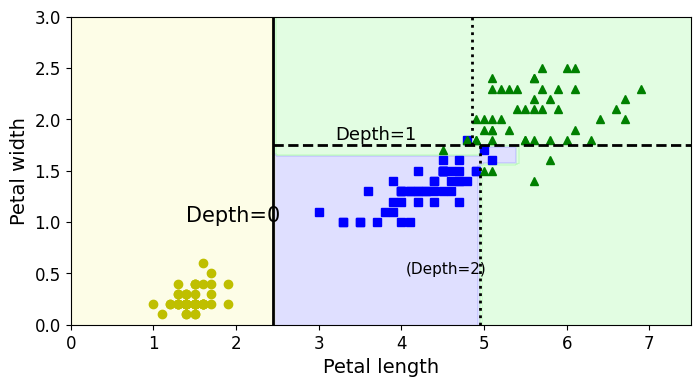

In [13]:
plt.figure(figsize=(8, 4))

plot_decision_boundary(tree_clf,X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)
plt.show()

The following cell rotates the data by angle 20

In [14]:
angle = np.pi / 180 * 20
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xr = X.dot(rotation_matrix)

**Question**
1. Fit another decision tree classifier max_depth = 2, to the rotated data
2. Plot the resulting decision boundaries
3. Print the clasifier score on training data

0.9733333333333334


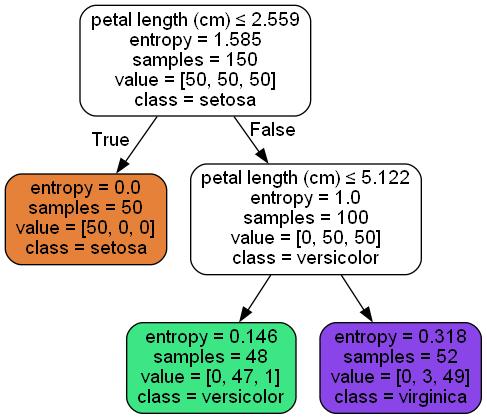

In [15]:
Xriris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf_all_features = DecisionTreeClassifier(max_depth=2, random_state=42, criterion='entropy')
tree_clf_all_features.fit(Xr, y)

tree_graph = export_graphviz(tree_clf_all_features, out_file=None, 
                        feature_names=iris.feature_names[2:],  
                        class_names=iris.target_names,  
                        filled=True, rounded=True,  
                        special_characters=True)  
graph = graphviz.Source(tree_graph)  
graph.render("iris_decision_tree_all_features") 

print(tree_clf_all_features.score(Xr,y))
png_bytes = graph.pipe(format='png')
Image(png_bytes)


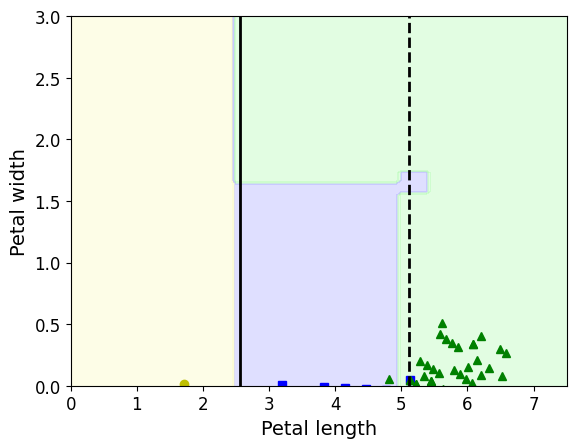

In [16]:
plot_decision_boundary(tree_clf,Xr, y)
plt.plot([2.559, 2.559], [0, 3], "k-", linewidth=2)
plt.plot([5.122, 5.122], [0, 3], "k--", linewidth=2)

### Q3.2 Logistic Regression
The following function plots the decision boundaries for a logistic regression classifier

In [17]:
import numpy as np
def plot_logistic_regression(clf, X, y, iris=True):

  x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
  y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
  h = 0.02  # step size in the mesh
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

  # Put the result into a color plot
  Z = Z.reshape(xx.shape)
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

  plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
  plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
  plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
  
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
  else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
  plt.legend(loc="lower right", fontsize=14)
  plt.show()

**Question**

1. Fit a logistic regression classifier to the original data
2. Plot the resulting decision boundaries
3. Print the clasifier score on training data

logistic regresion scor is : 0.9583333333333334


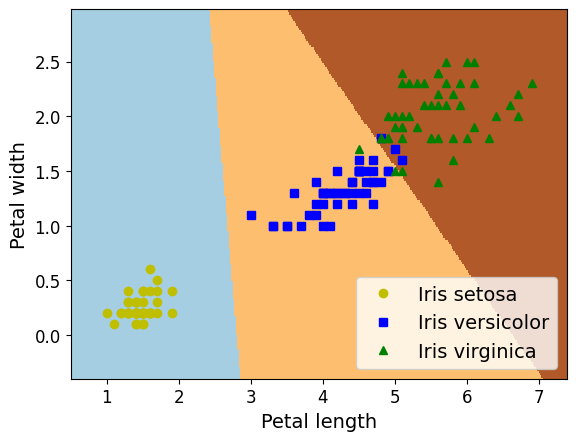

In [18]:
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr_classifier=LogisticRegression()
lr_classifier.fit(X_train,y_train)
print("logistic regresion scor is :",lr_classifier.score(X_train,y_train))
plot_logistic_regression(lr_classifier, X, y , iris=True)

**Question**
1. Fit another logistic regression classifier to the rotated data
2. Plot the resulting decision boundaries
3. Print the clasifier score on training data

logistic regresion scor is : 0.9583333333333334


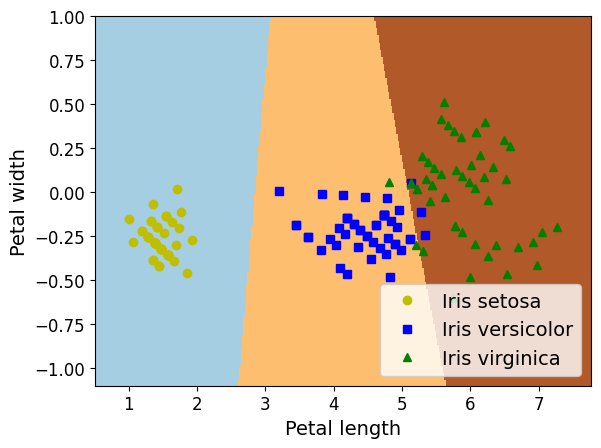

In [19]:
lr_classifier_rotated=LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(Xr, y, test_size=0.2, random_state=42)
lr_classifier_rotated.fit(X_train,y_train)
print("logistic regresion scor is :",lr_classifier_rotated.score(X_train,y_train))
plot_logistic_regression(lr_classifier_rotated, Xr, y , iris=True)

### Q3.3
1. Comment on the differences between the logistic regression and decision trees classifiers scores to the original and rotated data
2. Explain why that happened?

**Answer**

1. Logisitic regression is not affected at all by the rotated data as its score is almost the same in both rotated and orginal ones whiled  decision tree acurracy changed which means that decision tree using this data has higher sensitivty

2. The decision tree When the data is rotated, the decision boundaries of the tree are also rotated and changed result in a different partitioning and so different classification performance while in cotrast in logistic Regression  the decision boundary is also changed a little , but it remains linear and didnt change by much which doesnt affect alot the output accuracy

## Question 4 GridSearch

1. Generate a moons dataset using `make_moons(n_samples=10000, noise=0.4)`.

In [20]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)

2. Split it into a training set and a test set using train_test_split().

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

3. Use grid search with cross-validation (with the help of the GridSearchCV class) to find best hyperparameter (max_depth, max_leaf_nodes, min_samples_split) values for a DecisionTreeClassifier. 
    - Choose reasonable values for each hyperparameter.

In [22]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [ 2, 3 ,4],
    'max_leaf_nodes': [2, 4, 6],
    'min_samples_split': [1,2, 4]
}
tree_clf = DecisionTreeClassifier(random_state=42, criterion='entropy')
grid_search = GridSearchCV(tree_clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best hyperparameters:  {'max_depth': 2, 'max_leaf_nodes': 4, 'min_samples_split': 2}
Best score:  0.852875


C:\Users\ahmad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
45 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ahmad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ahmad\AppData\Roaming\Python\Python310\site-packages\sklearn\tree\_classes.py", line 969, in fit
    super().fit(
  File "C:\Users\ahmad\AppData\Roaming\Python\Python310\site-packages\sklearn\tree\_classes.py", line 265, in fit
    check_scalar(
  File "

4. Train it on the full training set using the best hyperparameters, and measure your model's performance on the test set.

In [23]:
from sklearn.metrics import accuracy_score 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
tree = DecisionTreeClassifier(max_depth=2, max_leaf_nodes=4, min_samples_split=2, random_state=42)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test set accuracy: ", accuracy)

Test set accuracy:  0.863


## Question 4 Regression Tree

### Question
For the following plot of the two decision tree regressors:
1. Comment on the results
2. Which model has a higher variance error? why?
3. Which model has a higher bias error? why?

**Answer**

1. The tree of max depth 2 is simpler and less complix maybe its doest get very accurate results but it doesnt overfit(learn noise) to training data like tree of max depth 5 which literally fit to each point on the left part of the graph which is not correct

2. Tree of depth 5 => Overfitting occurs when a model is too complex and captures the noise thus making the model with higher variance caz  as the model is too sensitive to the training data.

3. tree of depth 2 =>, underfitting occurs when a model is too simple and cannot capture the underlying patterns in the data, resulting in poor performance on both the training and test data thus having higher bias

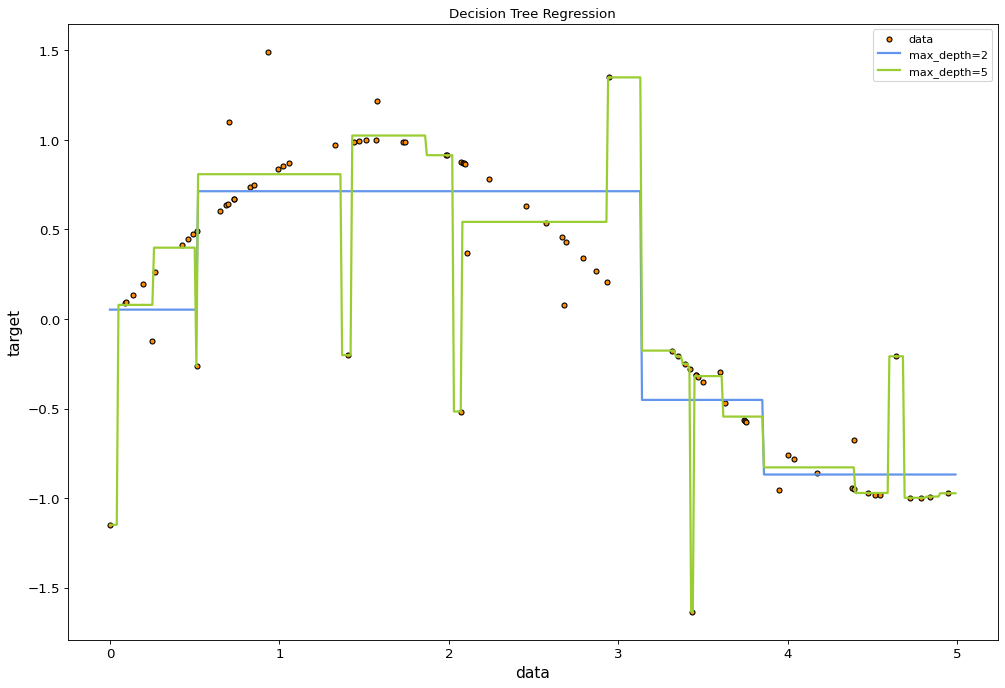

In [24]:
from sklearn.tree import DecisionTreeRegressor

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure(figsize=(15,10),dpi=80)
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()